In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/dataset_no_blind.csv', index_col=0)
blind_test = pd.read_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [3]:
dataset.drop(['Unnamed: 0.1'], axis=1, inplace=True)
blind_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
dataset.reset_index(drop=True, inplace=True)

In [5]:
scaler = StandardScaler()
scaler.fit(dataset[['GR','DT','ILD_log10','NPHI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
cv1 = KFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
mse_test_depth = []
mse_train_depth = []
max_splits = 1
for max_splits in range(1, 101):
    reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes= max_splits + 1, max_depth=8)
    arv = reg.fit(X_train[['GR','DT','CAL','ILD_log10', 'NPHI']], y_train)
    mse_test_depth.append(mean_squared_error(y_test,reg.predict(X_test[['GR','DT','CAL','ILD_log10','NPHI']])))
    mse_train_depth.append(mean_squared_error(y_train,reg.predict(X_train[['GR','DT','CAL','ILD_log10','NPHI']])))

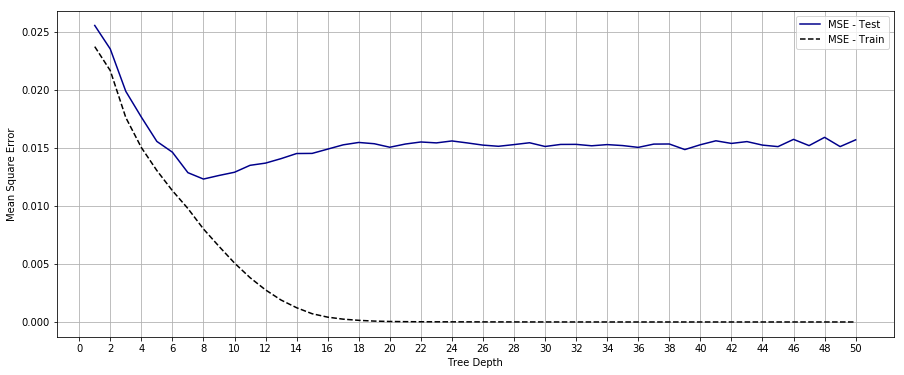

In [16]:
axe_x = []
for i in range(1, len(mse_test_depth)):
     axe_x.append(i)

        
plt.figure(figsize = ((15,6)))
plt.plot(np.arange(1, len(mse_test_depth)+1), np.asarray(mse_test_depth), c='darkblue', label = 'MSE - Test')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Square Error')

plt.plot(np.arange(1, len(mse_test_depth)+1), np.asarray(mse_train_depth), c='black', label = 'MSE - Train', ls='--')

x_ticks=np.arange(0,51,2)
y_ticks=np.arange(0,max(mse_test_depth))
#plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.legend()
plt.grid()

#fig.tight_layout()
plt.show()

In [17]:
mse_test_leafnodes = []
mse_train_leafnodes = []
max_splits = 1
for max_splits in range(1, 101):
    reg = DecisionTreeRegressor(criterion='mse', max_leaf_nodes= max_splits + 1, max_depth=8)
    arv = reg.fit(X_train[['GR','DT','CAL','ILD_log10', 'NPHI']], y_train)
    mse_test_leafnodes.append(mean_squared_error(y_test,reg.predict(X_test[['GR','DT','CAL','ILD_log10','NPHI']])))
    mse_train_leafnodes.append(mean_squared_error(y_train,reg.predict(X_train[['GR','DT','CAL','ILD_log10','NPHI']])))

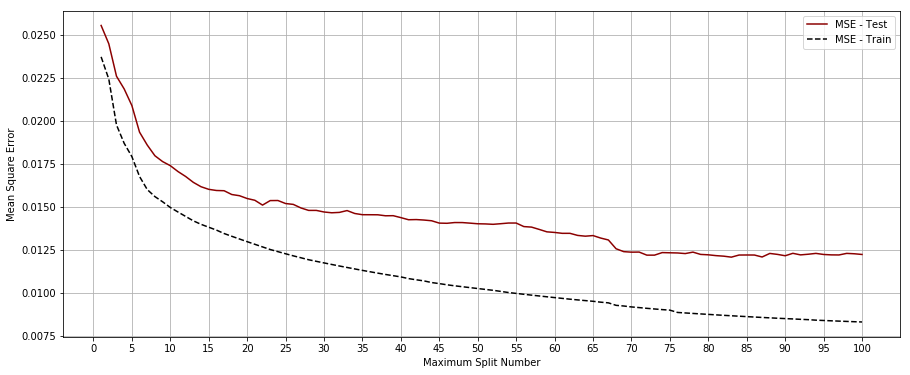

In [19]:
axe_x = []
for i in range(1, len(mse_test_leafnodes)):
     axe_x.append(i)

        
plt.figure(figsize = ((15,6)))
plt.plot(np.arange(1, len(mse_test_leafnodes)+1), np.asarray(mse_test_leafnodes), c='darkred', label = 'MSE - Test')
plt.xlabel('Maximum Split Number')
plt.ylabel('Mean Square Error')

plt.plot(np.arange(1, len(mse_test_leafnodes)+1), np.asarray(mse_train_leafnodes), c='black', label = 'MSE - Train', ls='--')

x_ticks=np.arange(0,101,5)
y_ticks=np.arange(15,max(mse_test_leafnodes),5)
#plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.legend()
plt.grid()

#fig.tight_layout()
plt.show()

In [20]:
mse_test_minsample = []
mse_train_minsample = []
for i in range(1, 101):
    reg = DecisionTreeRegressor(criterion='mse', min_samples_leaf=i, max_depth=6, max_leaf_nodes=22)
    arv = reg.fit(X_train[['GR','DT','CAL','ILD_log10','NPHI']], y_train)
    mse_test_minsample.append(mean_squared_error(y_test,reg.predict(X_test[['GR','DT','CAL','ILD_log10','NPHI']])))
    mse_train_minsample.append(mean_squared_error(y_train,reg.predict(X_train[['GR','DT','CAL','ILD_log10','NPHI']])))

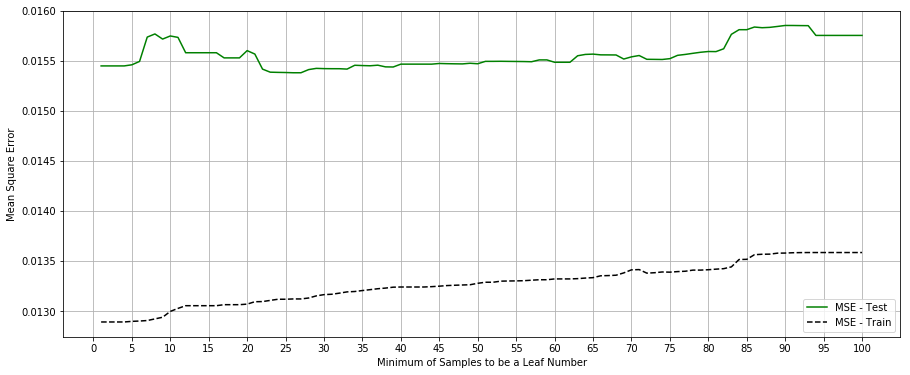

In [21]:
axe_x = []
for i in range(1, len(mse_test_minsample)):
     axe_x.append(i)

        
plt.figure(figsize = ((15,6)))
plt.plot(np.arange(1, len(mse_test_minsample)+1), np.asarray(mse_test_minsample), c='green', label = 'MSE - Test')
plt.xlabel('Minimum of Samples to be a Leaf Number')
plt.ylabel('Mean Square Error')

plt.plot(np.arange(1, len(mse_train_minsample)+1), np.asarray(mse_train_minsample), c='black', label = 'MSE - Train', ls='--')

x_ticks=np.arange(0,101,5)
#y_ticks=np.arange(15,max(mse_test),0.5)
#plt.yticks(y_ticks)
plt.xticks(x_ticks)
plt.legend()
plt.grid()

#fig.tight_layout()
plt.show()

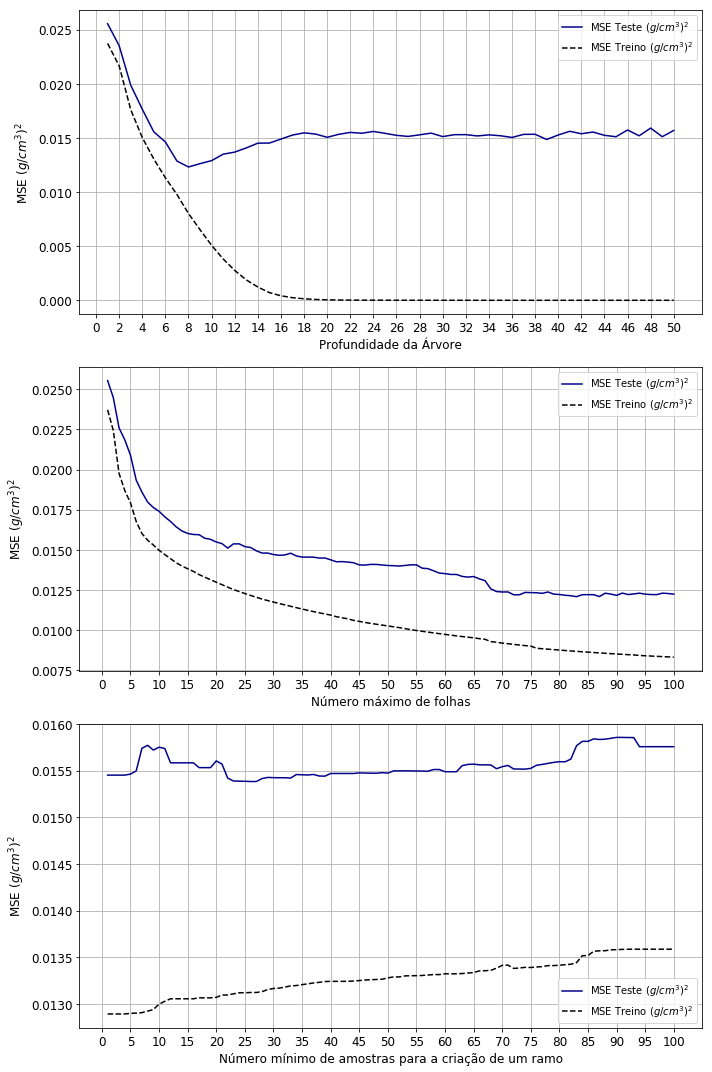

In [26]:
fig, axes = plt.subplots(3,1, figsize=(10,15))

axes[0].plot(np.arange(1, len(mse_test_depth)+1), np.asarray(mse_test_depth), 
             c='darkblue', label = 'MSE Teste $(g/cm^3)^2$')
axes[0].plot(np.arange(1, len(mse_test_depth)+1), np.asarray(mse_train_depth), 
             c='black', label = 'MSE Treino $(g/cm^3)^2$', ls='--')

x_ticks_depth=np.arange(0,51,2)
y_ticks_depth=np.arange(0,max(mse_test_depth),5)
axes[0].set_xticks(x_ticks_depth)
#axes[0].set_yticks(y_ticks_depth)
axes[0].set_ylabel('MSE $(g/cm^3)^2$')
axes[0].set_xlabel('Profundidade da Árvore')
#-----------------------------------------------------------------------------
axes[1].plot(np.arange(1, len(mse_test_leafnodes)+1), np.asarray(mse_test_leafnodes), 
             c='darkblue', label = 'MSE Teste $(g/cm^3)^2$')
axes[1].plot(np.arange(1, len(mse_test_leafnodes)+1), np.asarray(mse_train_leafnodes), 
             c='black', label = 'MSE Treino $(g/cm^3)^2$', ls='--')

x_ticks_leafnodes=np.arange(0,101,5)
y_ticks_leafnodes=np.arange(15,max(mse_test_leafnodes),5)
axes[1].set_xticks(x_ticks_leafnodes)
#axes[1].set_yticks(y_ticks_leafnodes)
axes[1].set_ylabel('MSE $(g/cm^3)^2$')
axes[1].set_xlabel('Número máximo de folhas')
#----------------------------------------------------------------------------
axes[2].plot(np.arange(1, len(mse_test_minsample)+1), np.asarray(mse_test_minsample),
             c='darkblue', label = 'MSE Teste $(g/cm^3)^2$')
axes[2].plot(np.arange(1, len(mse_train_minsample)+1), np.asarray(mse_train_minsample),
             c='black', label = 'MSE Treino $(g/cm^3)^2$', ls='--')

x_ticks_minsample=np.arange(0,101,5)
#y_ticks_minsample=np.arange(15,max(mse_test_leafnodes),5)
axes[2].set_xticks(x_ticks_minsample)
#axes[2].set_yticks(y_ticks_minsample)
axes[2].set_ylabel('MSE $(g/cm^3)^2$')
axes[2].set_xlabel('Número mínimo de amostras para a criação de um ramo')
#----------------------------------------------------------------------------
for ax in axes:
    ax.legend()
    ax.grid()
    
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
fig.tight_layout()

In [9]:
regressor = DecisionTreeRegressor(splitter='best', max_depth = 8, min_samples_leaf=27, max_leaf_nodes=22)
rfe = RFECV(estimator=regressor, step=1, cv=cv1, min_features_to_select=2)
rfe.fit(dataset[['GR','DT','ILD_log10','NPHI']], dataset.RHOB)

RFECV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
      estimator=DecisionTreeRegressor(criterion='mse', max_depth=8,
                                      max_features=None, max_leaf_nodes=22,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=27, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      presort=False, random_state=None,
                                      splitter='best'),
      min_features_to_select=2, n_jobs=None, scoring=None, step=1, verbose=0)

In [10]:
rfe.support_

array([ True, False,  True,  True])

In [11]:
scaler.fit(dataset[['GR','ILD_log10','NPHI']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
regressor = DecisionTreeRegressor(splitter='best', max_depth = 8, min_samples_leaf=27, max_leaf_nodes=22)
params = {'max_features':[2,3]}
dec_tree = GridSearchCV(regressor, params,scoring='neg_mean_squared_error', cv=cv1, return_train_score=True)
dec_tree.fit(scaler.transform(dataset[['GR','ILD_log10','NPHI']]),dataset.RHOB)

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=8,
                                             max_features=None,
                                             max_leaf_nodes=22,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=27,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_features': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error

In [13]:
df = pd.DataFrame(dec_tree.cv_results_)
df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
1,0.019486,0.002060,0.00050,0.00050,3,{'max_features': 3},-0.017410,-0.019322,-0.017421,-0.017373,-0.017882,0.000832,1,-0.016591,-0.015529,-0.016751,-0.016511,-0.016345,0.000479
0,0.016490,0.000502,0.00125,0.00109,2,{'max_features': 2},-0.018687,-0.020603,-0.018060,-0.018432,-0.018946,0.000982,2,-0.017592,-0.016337,-0.017244,-0.018322,-0.017374,0.000714


In [14]:
x_blindscale = scaler.transform(blind_test[['GR','ILD_log10','NPHI']])

In [15]:
blind_test['RHOB_dec_tree'] = dec_tree.predict(x_blindscale)

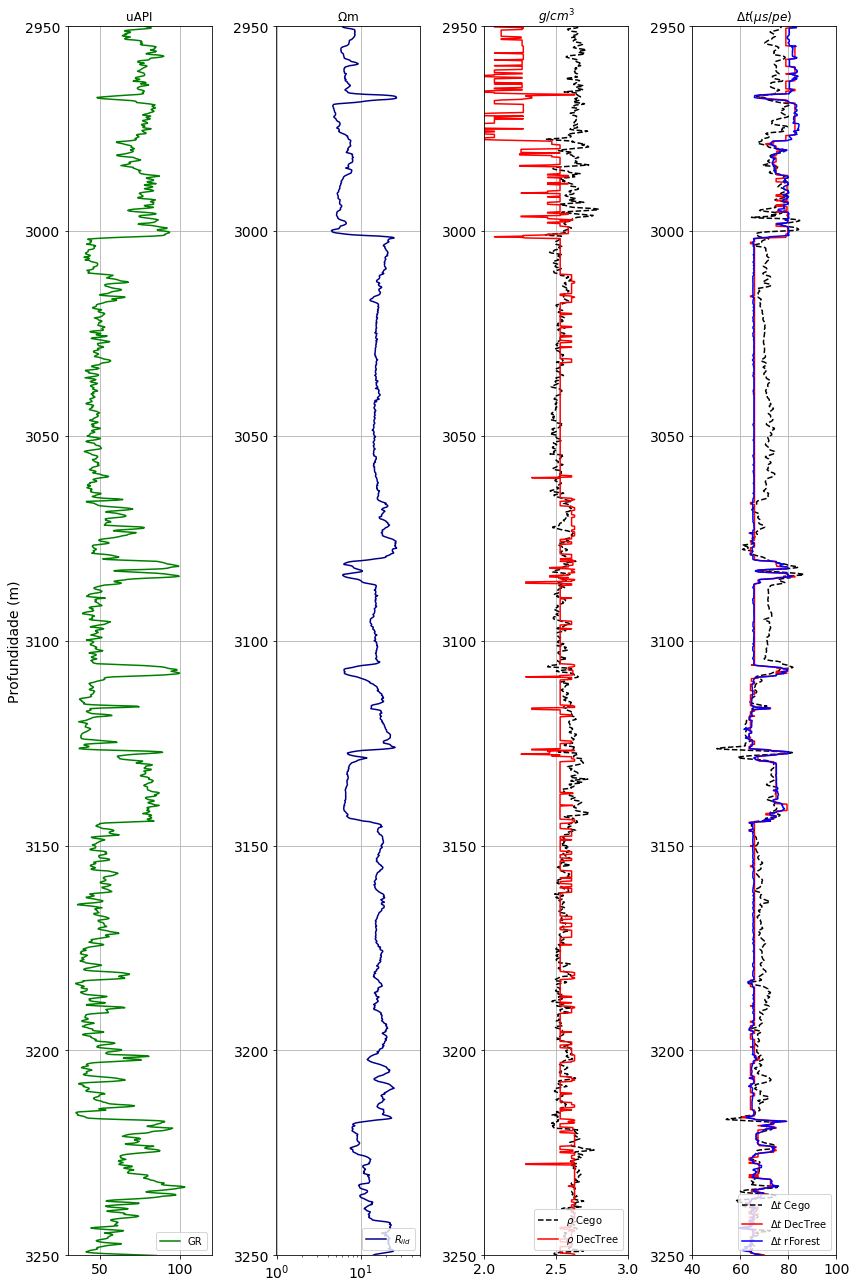

In [19]:
fig, axes = plt.subplots(ncols=4, figsize=(12,18))
#axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='green', label='GR')
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', label='$R_{ild}$')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'black', label='$\\rho$ Cego', ls='--')
axes[2].plot(blind_test.RHOB_dec_tree,blind_test.DEPT, c='red', label='$\\rho$ DecTree')
# axes[2].plot(blind_test.RHOB_r_forest, blind_test.DEPT, c='blue', label='$\\rho$ rForest')
axes[2].set_xlim(2,3)

# axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
# axes2.set_xlim(0,45)
# axes2.legend(loc='upper right')
# axes2.invert_yaxis()

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='$\Delta t$ Cego', ls='--')
axes[3].plot(blind_test.DT_dec_tree.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='red', label='$\Delta t$ DecTree')
axes[3].plot(blind_test.DT_r_forest.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='blue', label='$\Delta t$ rForest')
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
#axes2.set_xlabel('$\phi_n$(%)')
axes[2].set_title('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/pe )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend(loc=4)
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

plt.tight_layout()


In [20]:
blind_test.to_csv(r'C:/Users/mathe/Desktop/MATHEUS/UFBA/IC/shalegas-rad/blind_data.csv')

In [24]:
blind_test.head()

,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,DEPT,GR,ILD_log10,NPHI,...,Formacao,DT_Ridge,ILD,RHOB_Ridge,DT_KNN,RHOB_KNN,DT_dec_tree,RHOB_dec_tree,DT_r_forest,RHOB_r_forest
0,0,0,0,0,0,0,1968.0936,38.5907,0.486912,14.1915,...,Candeias,74.929268,3.0684,2.417544,2.523311,2.566042,74.760178,2.528123,71.566755,2.523311
1,1,1,1,1,1,1,1968.2460,42.0137,0.495128,12.8958,...,Candeias,74.272424,3.1270,2.447458,2.529758,2.505900,74.760178,2.528123,71.128664,2.529758
2,2,2,2,2,2,2,1968.3984,47.8897,0.503491,11.9561,...,Candeias,73.710652,3.1878,2.484268,2.535851,2.510867,74.760178,2.528123,70.995275,2.535851
3,3,3,3,3,3,3,1968.5508,51.3829,0.516469,13.1344,...,Candeias,74.006718,3.2845,2.487511,2.538053,2.537700,74.760178,2.528123,71.071052,2.538053
4,4,4,4,4,4,4,1968.7032,52.6227,0.530392,14.4057,...,Candeias,74.374604,3.3915,2.479479,2.505232,2.589633,74.760178,2.470055,71.509142,2.505232


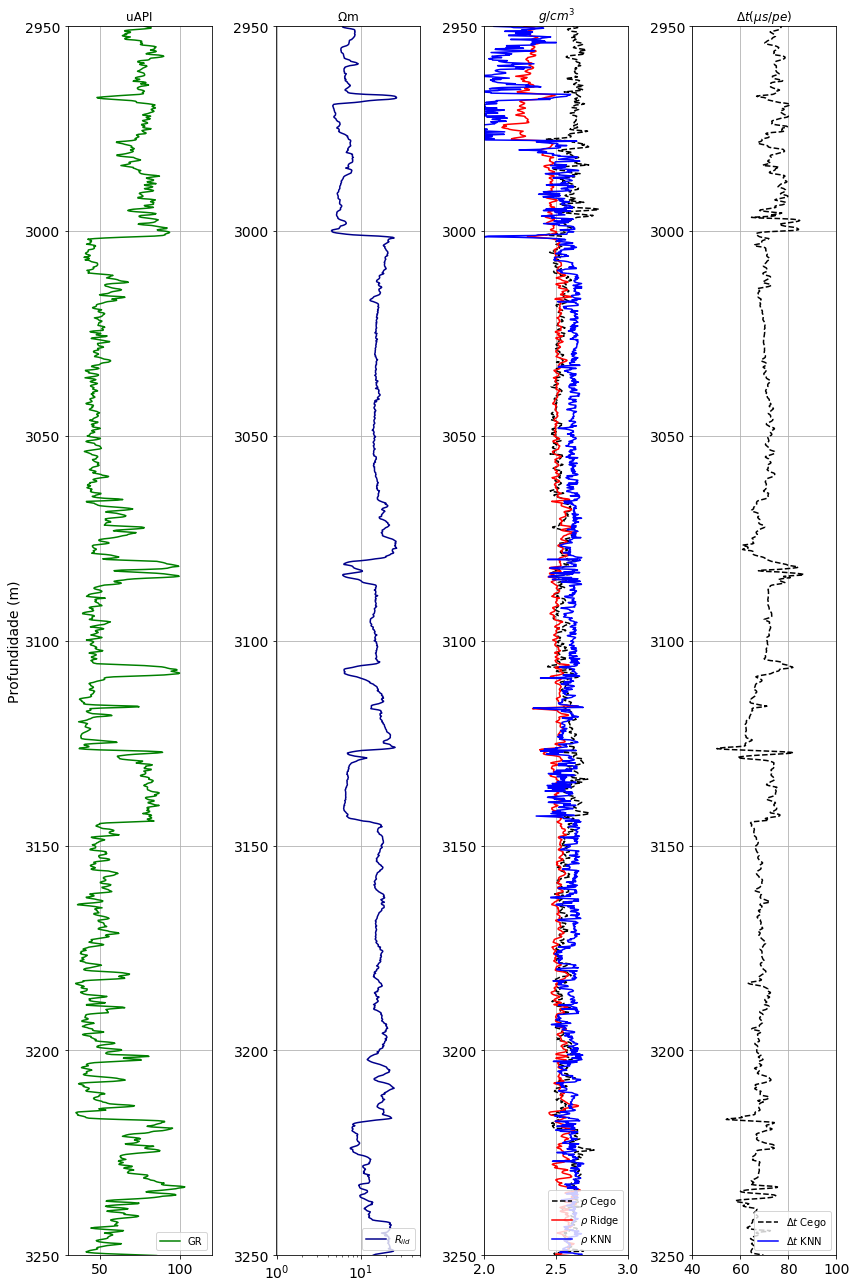

In [25]:
fig, axes = plt.subplots(ncols=4, figsize=(12,18))
#axes2 = axes[2].twiny()

axes[0].plot(blind_test.GR, blind_test.DEPT, c='green', label='GR')
axes[0].set_xlim(30,120)

axes[1].semilogx(blind_test.ILD,blind_test.DEPT, c = 'darkblue', label='$R_{ild}$')
axes[1].set_xlim(0,50)

axes[2].plot(blind_test.RHOB, blind_test.DEPT, c = 'black', label='$\\rho$ Cego', ls='--')
axes[2].plot(blind_test.RHOB_Ridge,blind_test.DEPT, c='red', label='$\\rho$ Ridge')
axes[2].plot(blind_test.RHOB_KNN, blind_test.DEPT, c='blue', label='$\\rho$ KNN')
axes[2].set_xlim(2,3)

# axes2.plot(blind_test.NPHI, blind_test.DEPT, c = 'blue', label = 'NPHI', lw = 0.8, ls='--')
# axes2.set_xlim(0,45)
# axes2.legend(loc='upper right')
# axes2.invert_yaxis()

axes[3].plot(blind_test.DT.loc[(blind_test.DT > 0)].values, 
           blind_test.DEPT.loc[(blind_test.DT > 0)].values, c='black', label='$\Delta t$ Cego', ls='--')
#axes[3].plot(blind_test.DT_Ridge.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
#             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
#             c='red', label='$\Delta t$ Ridge')
axes[3].plot(blind_test.DT_KNN.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values, 
             blind_test.DEPT.loc[(blind_test.GR > 0) & (blind_test.ILD > 0) & (blind_test.RHOB > 0) & (blind_test.CAL > 0)].values,
             c='blue', label='$\Delta t$ KNN')
axes[3].set_xlim(40,100)

axes[0].set_title('uAPI')
axes[1].set_title('$\Omega$m')
#axes2.set_xlabel('$\phi_n$(%)')
axes[2].set_title('$g/cm^3$')
axes[3].set_title('$\Delta t  (\mu s/pe )$')
axes[0].set_ylabel('Profundidade (m)')


for ax in axes:
    ax.set_ylim(2950,3250)
    ax.invert_yaxis()
    ax.grid()
    ax.legend(loc=4)
    
axes[2].legend(loc='lower right')
axes[3].legend(loc='lower right')

plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

plt.tight_layout()